1. Download the Yelp review dataset “Yelp/yelp_review_full”. Split each sample by calling the string method “.split()” and choose the correct statements about the dataset.

In [2]:
from datasets import load_dataset
ds = load_dataset('yelp/yelp_review_full', split='all')
ds

Dataset({
    features: ['label', 'text'],
    num_rows: 700000
})

In [3]:
ds = ds.map(lambda x: {'n_tokens': len(x['text'].split())}, num_proc=12)

Map (num_proc=12):   0%|          | 0/700000 [00:00<?, ? examples/s]

In [4]:
# The dataset contains close to 99M words?
n_words = sum(ds['n_tokens'])
print(n_words / 1_000_000)

93.878307


In [5]:
n_tokens = 0
for sample in ds:
    n_tokens += len(sample['text'].split())
n_tokens

93878307

In [6]:
# B. There are more than 300 samples that contain a single word
ds.filter(lambda x: x['n_tokens'] == 1, num_proc=6)

Filter (num_proc=6):   0%|          | 0/700000 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'text', 'n_tokens'],
    num_rows: 355
})

In [13]:
# D. “Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for.” is one of the single words in the dataset
single_words = ds.filter(lambda x: x['n_tokens'] == 1, num_proc=6)['text']
sample = "Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on-top.\\nTo-die-for."
sample in single_words

True

In [14]:
# E. Average length of a sample is 134.1
sum(ds['n_tokens']) / len(ds)

134.11186714285714

In [15]:
# F. The distribution of the length of the samples is right skewed
import pandas as pd
s = pd.Series(ds['n_tokens'])

<Axes: >

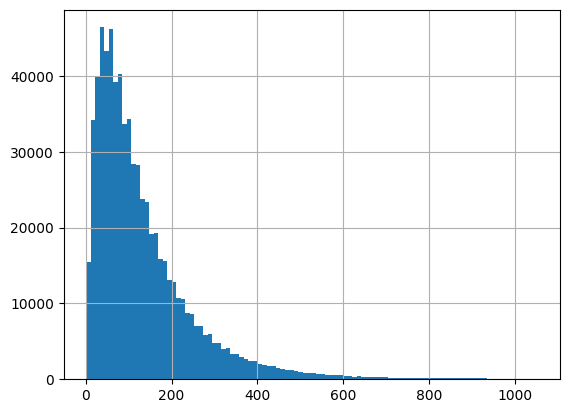

In [17]:
s.hist(bins=100)

2. Load the “bert-base-uncased” pre-trained tokenizer and choose the correct statements about the tokenizer.

In [18]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/home/jaidevd/conda/envs/dlp/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [19]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [20]:
# A. The tokenizer is used for the BERT model with the context length of 512
tokenizer.model_max_length

512

In [21]:
# B. The tokenizer has 5 special tokens
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [23]:
len(tokenizer.special_tokens_map)

5

In [24]:
# C. Tokenizing a sample that contains more than 512 words would result in truncation of all tokens beyond the length 512

# Pick a sample that's too long from the yelp dataset
long = ds.filter(lambda x: x['n_tokens'] > 512)
len(long)

Filter:   0%|          | 0/700000 [00:00<?, ? examples/s]

12441

In [25]:
sample = long['text'][0]

In [27]:
enc = tokenizer(sample)
print(len(enc['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (1019 > 512). Running this sequence through the model will result in indexing errors


1019


In [29]:
long['n_tokens'][0]

712

In [30]:
# D. Tokenizer inserts all the special tokens when it processes a single sample as an input
# E. Tokenizer inserts [CLS] and [SEP] special tokens when it processes a single sample as an input
# F. Tokenizer inserts only [CLS]special token when it processes a single sample as an input

# select a few random samples
import random
n_samples = 5
ix = random.choices(range(len(ds)), k=n_samples)
enc = tokenizer(ds.select(ix)['text'])

In [32]:
for token_ids in enc['input_ids']:
    print(tokenizer.decode(token_ids))

[CLS] # aroundchandler so i finally made it here. so much hype about this place. now i don't consider myself your average wing eater. i eat a serious amount of buffalo wings. i even made it to state championship for a wing eating contest. the wings here are good. the wings them self are average, but the sauces are way above average. i always judge wings based on the standard hot. the hot was fairly hot, but very tasty. i also tried the atl rub. the flavor was fantastic. i'm not a cool aid drinker, i stay away from sugar. but the fact they had cool aid i thought was pretty cool. i will be a regular here and will try all 18 flavors of wings!! # chandleraz [SEP]
[CLS] i tried the satay meal with 2 chicken satays and it was great! the chicken was nicely marinated and came with several sides to make it a meal. the woman taking orders was very friendly and the food was made within 10 mins of ordering. the meal was $ 9, a little much for a small lunch meal but it was pretty filling and tasty!

3. Use “BertConfig” and “BertForMaskedLM” to construct the default (original) BERT model. Choose the correct statements

In [33]:
from transformers import BertConfig, BertForMaskedLM
cfg = BertConfig()
model = BertForMaskedLM(cfg)

In [37]:
#  A. The model has 12 Bert layers
# B. The model has 6 Bert layers
cfg

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [41]:
# C. The model uses absolute position embeddings - yes.
# D. The word embedding (token embedding) layer has about 23 million learnable parameters
n_params = 0
for p in model.bert.embeddings.word_embeddings.parameters():
    n_params += p.numel()
print(n_params / 1_000_000)

23.440896


In [42]:
# E. The total number of parameters in the model is close to 110 million
n_params = 0
for p in model.parameters():
    n_params += p.numel()
print(n_params / 1_000_000)

109.514298


4.  Double the context length from 512 to 1024 (you can change it in the configuration). Count the number of parameters and enter the change in the number of parameters (in millions) compared to the default configuration.

In [49]:
cfg = BertConfig(max_position_embeddings=1024)
model = BertForMaskedLM(cfg)

n_params = 0
for p in model.parameters():
    n_params += p.numel()
print(n_params / 1_000_000)

109.907514


In [50]:
model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementw

---

5. Pack (chunk) the samples such that the length of all the samples in the dataset is 512 (for efficient training). Define a mapping function that implements the following procedure

  * Take a batch of 1000 samples
  * Tokenize it to get input IDs and attention mask
  * Concatenate all the input IDs
  * Chunk the concatenated IDs into a size of 512
  * Drop the last chunk if its length is less than 512
  * Pack all the chunks
  * Iterate over all the batches in the dataset 

Store the resulting dataset in the variable “ds_chunked”. Enter the total number of samples in the new dataset.
Note: the batch size should be kept at 1000 while calling "ds.map()" for theanswer to match.

In [56]:
from itertools import chain

In [58]:
def chunk(batch):
    enc = tokenizer(batch['text'])
    input_ids = list(chain(*enc['input_ids']))
    attention_mask = list(chain(*enc['attention_mask']))
    remainder = len(input_ids) % 512
    input_ids = input_ids[:-remainder]
    attention_mask = attention_mask[:-remainder]
    return {'input_ids': input_ids, 'attention_mask': attention_mask}

ds_chunked = ds.batch(1000, num_proc=6).map(chunk, num_proc=9)
ds_chunked

Map (num_proc=9):   0%|          | 0/702 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'text', 'n_tokens', 'input_ids', 'attention_mask'],
    num_rows: 702
})

In [68]:
# try another way

def chunk(batch):
    enc = tokenizer(batch['text'])
    input_ids = enc['input_ids']
    attention_masks = enc['attention_mask']
    new_input_ids = []
    for sample in input_ids:
        new_input_ids.extend(sample)
    new_attention_mask = []
    for sample in attention_masks:
        new_attention_mask.extend(sample)
    assert len(new_input_ids) == len(new_attention_mask)
    remainder = len(new_input_ids) % 512
    new_input_ids, new_attention_mask = new_input_ids[:-remainder], new_attention_mask[:-remainder]
    return {'input_ids': [new_input_ids], 'attention_mask': [new_attention_mask]}
        
    
xx = ds.map(chunk, batched=True, batch_size=1000, num_proc=9, remove_columns=ds.column_names)

Map (num_proc=9):   0%|          | 0/700000 [00:00<?, ? examples/s]

In [69]:
xx

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 702
})

In [104]:
def chunk(batch):
    enc = tokenizer(batch['text'])
    input_ids = list(chain(*enc['input_ids']))
    attention_mask = list(chain(*enc['attention_mask']))
    remainder = len(input_ids) % 512
    input_ids = input_ids[:-remainder]
    attention_mask = attention_mask[:-remainder]
    input_ids = [input_ids[i:(i+512)] for i in range(0, len(input_ids), 512)]
    attention_mask = [attention_mask[i:(i+512)] for i in range(0, len(attention_mask), 512)]
    return {'input_ids': input_ids, 'attention_mask': attention_mask}

ds_chunked = ds.map(chunk, num_proc=9, batched=True, batch_size=1000, remove_columns=ds.column_names)
ds_chunked

Map (num_proc=9):   0%|          | 0/700000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 245985
})

In [105]:
ds

Dataset({
    features: ['label', 'text', 'n_tokens'],
    num_rows: 700000
})

In [106]:
len(ds)  / len(ds_chunked)

2.845701973697583

6. Split the new dataset into training and test sets with the test_size=0.05 and seed=42. Use the appropriate data collator function for the MLM objective and set the masking probability to 0.2. Use the data loader from PyTorch to load a batch of samples, and enter the token ID corresponding to the unmasked token.

In [107]:
ds_split = ds_chunked.train_test_split(test_size=0.05, seed=42)

In [108]:
ds_split

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 233685
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 12300
    })
})

In [109]:
from transformers import DataCollatorForLanguageModeling
collator = DataCollatorForLanguageModeling(tokenizer, mlm_probability=0.2)

In [110]:
from torch.utils.data import DataLoader

In [111]:
loader = DataLoader(ds_split['train'], collate_fn=collator, batch_size=8)

In [112]:
for batch in loader:
    break

In [113]:
batch

{'input_ids': tensor([[ 3513,  1010,  1045,  ...,  3722, 10826,  2005],
        [  103,  5150,  2046,  ...,  2052,  2022,  2986],
        [ 1010,  1998,  1999,  ...,  1044, 18863,  2005],
        ...,
        [ 2031,  1037,  2309,  ...,  2056,  2009,  2001],
        [ 2061,  2000,  3713,  ...,  2000,  5247,  2058],
        [ 1045,  2001,  2012,  ..., 28248,  1998,  2980]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[-100, -100, -100,  ..., -100, -100, -100],
        [3053, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        ...,
        [2031, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100]])}

In [88]:
from transformers import TrainingArguments, Trainer

In [115]:
cfg.max_position_embeddings = 512
cfg.num_hidden_layers = 6
cfg.hidden_size = 384
cfg.intermediate_size = 1536

model = BertForMaskedLM(cfg)
collator = DataCollatorForLanguageModeling(tokenizer, mlm_probability=0.2)

train_args = TrainingArguments(
    output_dir='out-bert',
    eval_strategy='steps',
    eval_steps=1000,
    num_train_epochs=1,
    per_device_eval_batch_size=8,
    per_device_train_batch_size=8,
    bf16=False, fp16=False, tf32=False, adam_beta1=0.9, adam_beta2=0.999,
    learning_rate=2e-5, weight_decay=0.01, gradient_accumulation_steps=1, logging_strategy='steps', save_steps=500,
    save_total_limit=10
)
trainer = Trainer(model=model, args=train_args, train_dataset=ds_split['train'], eval_dataset=ds_split['test'], data_collator=collator)
yuri = trainer.train()

Step,Training Loss,Validation Loss
1000,6.437700,6.325556


KeyboardInterrupt: 

In [94]:
loader = DataLoader(ds_split['train'], collate_fn=collator, batch_size=4)
for batch in loader:
    break
batch

{'input_ids': tensor([[ 101, 2043, 1045,  ...,    0,    0,    0],
        [ 101, 2326, 2001,  ...,    0,    0,    0],
        [ 101, 2023, 1996,  ..., 1012, 1012, 1012],
        [ 101, 2293, 2023,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100],
        [-100, -100, -100,  ..., 1012, -100, -100],
        [-100, -100, -100,  ..., -100, -100, -100]])}

In [99]:
batch['input_ids'].shape

torch.Size([4, 186368])

In [116]:
tokenizer.model_max_length

512

In [102]:
enc = ds_split['train'][0]

In [103]:
len(enc['input_ids'])

158208

In [117]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [118]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}